### Шаг 1. Откройте файлы с данными

In [1]:
# импорт библиотек
import pandas as pd
import math
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score , roc_auc_score, roc_curve 

In [2]:
# открытие требующихся файлов
df_train = pd.read_csv('hotel_train.csv')
df_test = pd.read_csv('hotel_test.csv')
# уберем ограничение на вывод колонок
pd.set_option('display.max_columns', 50) 
# получение общей информации о таблице df_train
display(df_train.info())
display(df_train.tail(3),'df_train')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

None

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
65226,84094,0,7.0,2016,December,53,31,2,4,2.0,0.0,0.0,BB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,1,6
65227,84117,0,17.0,2016,December,53,30,2,5,2.0,0.0,0.0,SC,FRA,TA/TO,0,0,0,A,0,0,Transient,0,1,7
65228,84121,0,107.0,2016,December,53,31,2,5,2.0,0.0,0.0,BB,FRA,TA/TO,0,0,0,A,0,0,Transient,0,0,7


'df_train'

In [3]:
# получение общей информации о таблице df_test
display(df_test.info())
display(df_test.tail(3),'df_test')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

None

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
32409,97901,0,23.0,2017,August,35,30,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7
32410,97902,0,34.0,2017,August,35,31,2,5,2.0,0.0,0.0,BB,DEU,TA/TO,0,0,0,D,0,0,Transient,0,4,7
32411,97903,0,109.0,2017,August,35,31,2,5,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,0,7


'df_test'

#### Вывод

Таблицы открываются правильно, без ошибок.

### Шаг 2. Предобработка и исследовательский анализ данных

#### Предобработка данных

In [4]:
# выведем случайную строку для выявления лишних пробелов
display(df_train.loc[256])
# посмотрим все уникальные значения столбца с наименованием страны
df_train.country.unique()

id                                             261
is_canceled                                      1
lead_time                                     48.0
arrival_date_year                             2015
arrival_date_month                            July
arrival_date_week_number                        29
arrival_date_day_of_month                       16
stays_in_weekend_nights                          0
stays_in_week_nights                             1
adults                                         1.0
children                                       0.0
babies                                         0.0
meal                                     BB       
country                                        PRT
distribution_channel                        Direct
is_repeated_guest                                0
previous_cancellations                           0
previous_bookings_not_canceled                   0
reserved_room_type                A               
booking_changes                

array(['GBR', 'PRT', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'USA', 'DEU',
       'BEL', 'CHE', 'CN', 'GRC', 'NLD', 'ARG', 'RUS', 'SWE', 'POL',
       'EST', 'CZE', 'ITA', 'FIN', 'DNK', 'MOZ', 'BWA', 'LUX', 'BRA',
       'SVN', 'ALB', 'CHN', 'MEX', 'MAR', 'SMR', 'LVA', 'CHL', 'AUT',
       'LTU', 'TUR', 'ISR', 'IND', 'CYM', 'AUS', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'TUN', 'ARE', 'HRV', 'HKG', 'IRN', 'GIB',
       'JEY', 'URY', 'ZAF', 'COL', 'GGY', 'KWT', 'CYP', 'KAZ', 'THA',
       'DOM', 'NGA', 'BLR', 'VEN', 'UKR', 'ARM', 'JPN', 'LKA', 'MYS',
       'BIH', 'MUS', 'OMN', 'SUR', 'JAM', 'BGR', 'CIV', 'SRB', 'JOR',
       'SYR', 'PHL', 'PRI', 'SGP', 'BDI', 'LBN', 'AGO', 'VNM', 'AZE',
       'PLW', 'NZL', 'EGY', 'MDV', 'CMR', 'MLT', 'SVK', 'MWI', 'STP',
       'TWN', 'IDN', 'SEN', 'PER', 'SAU', 'KNA', 'ETH', 'ECU', 'IRQ',
       'AND', 'HND', 'PAK', 'GEO', 'ZMB', 'QAT', 'KHM', 'MCO', 'BGD',
       'ISL', 'UZB', 'IMN', 'TJK', 'NIC', 'BEN', 'MAC', 'VGB', 'TZA',
       'GAB', 'MKD', 

In [5]:
# удаление столбца id
df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)
# преобразование типов данных
for value in ('adults', 'babies', 'children', 'lead_time'):
    df_train[value] = df_train[value].astype('int')
    df_test[value] = df_test[value].astype('int')
# удаление лишних пробелов
df_train['reserved_room_type'] = df_train['reserved_room_type'].str.strip()
df_test['reserved_room_type'] = df_test['reserved_room_type'].str.strip()
df_train['meal'] = df_train['meal'].str.strip()
df_test['meal'] = df_test['meal'].str.strip()    

In [6]:
# проверка на дубликаты
df_train.drop_duplicates()
df_test.drop_duplicates()
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     65229 non-null  int64 
 1   lead_time                       65229 non-null  int64 
 2   arrival_date_year               65229 non-null  int64 
 3   arrival_date_month              65229 non-null  object
 4   arrival_date_week_number        65229 non-null  int64 
 5   arrival_date_day_of_month       65229 non-null  int64 
 6   stays_in_weekend_nights         65229 non-null  int64 
 7   stays_in_week_nights            65229 non-null  int64 
 8   adults                          65229 non-null  int64 
 9   children                        65229 non-null  int64 
 10  babies                          65229 non-null  int64 
 11  meal                            65229 non-null  object
 12  country                         65229 non-null

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     32412 non-null  int64 
 1   lead_time                       32412 non-null  int64 
 2   arrival_date_year               32412 non-null  int64 
 3   arrival_date_month              32412 non-null  object
 4   arrival_date_week_number        32412 non-null  int64 
 5   arrival_date_day_of_month       32412 non-null  int64 
 6   stays_in_weekend_nights         32412 non-null  int64 
 7   stays_in_week_nights            32412 non-null  int64 
 8   adults                          32412 non-null  int64 
 9   children                        32412 non-null  int64 
 10  babies                          32412 non-null  int64 
 11  meal                            32412 non-null  object
 12  country                         32412 non-null

None

##### Вывод

- Лишние пробелы обнаружены и удалены только в двух столбцах: `meal` и `reserved_room_type`
- Удален столбец `id` так как имеет повторяющийся характер как у индекса
- Дубликатов не обнаружено
- Пропусков в данных нет
- Требующиеся значения преобразованы и приведены к корректному типу данных

#### Исследовательский анализ

In [7]:
# создание функции для приведения названия страны к формату int
display(df_train.country.value_counts().head(7))
display(df_test.country.value_counts().head(7))
def country_func(row):
    country_row = row['country']
    if country_row == 'PRT':
        return 1
    elif country_row == 'FRA':
        return 2
    elif country_row == 'GBR':
        return 3
    elif country_row == 'ESP':
        return 4
    elif country_row == 'DEU':
        return 5
    elif country_row == 'ITA':
        return 6
    else:
        return 7
# создание корректного столбца, где страны выражены цифрами
df_train['country_numeric'] = df_train.apply(country_func, axis=1)
df_test['country_numeric'] = df_test.apply(country_func, axis=1)
# удаление столбца со странами, где тип данных object
df_train = df_train.drop(['country'], axis=1)
df_test = df_test.drop(['country'], axis=1)

PRT    28831
FRA     5974
GBR     5109
ESP     4900
DEU     3887
ITA     2327
IRL     1445
Name: country, dtype: int64

PRT    9887
GBR    3927
FRA    3477
DEU    2378
ESP    1932
ITA    1153
IRL    1060
Name: country, dtype: int64

In [8]:
# создание функции для приведения названия месяца к формату int
def month(row):
    month = row['arrival_date_month']    
    if month == 'January':     
        return 1
    elif month == 'February':     
        return 2
    elif month == 'March':     
        return 3
    elif month == 'April':     
        return 4    
    elif month == 'May':     
        return 5
    elif month == 'June':     
        return 6
    elif month == 'July':     
        return 7
    elif month == 'August':     
        return 8  
    elif month == 'September':     
        return 9
    elif month == 'October':     
        return 10
    elif month == 'November':     
        return 11
    elif month == 'December':     
        return 12  
# создание корректного столбца, где месяцы выражены цифрами
df_train['arrival_date_month_numeric'] = df_train.apply(month, axis=1)
df_test['arrival_date_month_numeric'] = df_test.apply(month, axis=1)
# удаление столбца с месяцами, где тип данных object
df_train = df_train.drop(['arrival_date_month'], axis=1)
df_test = df_test.drop(['arrival_date_month'], axis=1)

In [9]:
# создание функции для приведения опции заказа к формату int
def meal_to_num(row):
    meal_value = row['meal']    
    if meal_value == 'SC':     
        return 1
    elif meal_value == 'BB':     
        return 2
    elif meal_value == 'HB':     
        return 3
    elif meal_value == 'FB':     
        return 4    
# создание корректного столбца, где опции заказа выражены цифрами
df_train['meal_numeric'] = df_train.apply(meal_to_num, axis=1)
df_test['meal_numeric'] = df_test.apply(meal_to_num, axis=1)
# удаление столбца, где тип данных object
df_train = df_train.drop(['meal'], axis=1)
df_test = df_test.drop(['meal'], axis=1)

In [10]:
# создание функции для приведения типа заказчика к формату int
def customer_to_num(row):
    customer_value = row['customer_type']    
    if customer_value == 'Contract':     
        return 1
    elif customer_value == 'Group':     
        return 2
    elif customer_value == 'Transient':     
        return 3
    elif customer_value == 'Transient-Party':     
        return 4    
# создание корректного столбца, где тип заказчика выражен цифрами
df_train['customer_type_numeric'] = df_train.apply(customer_to_num, axis=1)
df_test['customer_type_numeric'] = df_test.apply(customer_to_num, axis=1)
# удаление столбца, где тип данных object
df_train = df_train.drop(['customer_type'], axis=1)
df_test = df_test.drop(['customer_type'], axis=1)

In [11]:
# создание функции для приведения каналов дистрибуции к формату int
def channel_to_num(row):
    channel_value = row['distribution_channel']    
    if channel_value == 'Direct':     
        return 1
    elif channel_value == 'TA/TO':     
        return 2
    elif channel_value == 'Corporate':     
        return 3
    elif channel_value == 'GDS':     
        return 4    
# создание корректного столбца, где каналы дистрибуции выражены цифрами
df_train['distribution_channel_numeric'] = df_train.apply(channel_to_num, axis=1)
df_test['distribution_channel_numeric'] = df_test.apply(channel_to_num, axis=1)
# удаление столбца, где тип данных object
df_train = df_train.drop(['distribution_channel'], axis=1)
df_test = df_test.drop(['distribution_channel'], axis=1)

In [12]:
# создание функции для приведения типа комнаты к формату int
def roomtype_to_num(row):
    room_value = row['reserved_room_type']    
    if room_value == 'A':     
        return 1
    elif room_value == 'B':     
        return 2
    elif room_value == 'C':     
        return 3
    elif room_value == 'D':     
        return 4   
    elif room_value == 'E':     
        return 5
    elif room_value == 'F':     
        return 6
    elif room_value == 'G':     
        return 7  
# создание корректного столбца, где тип комнаты выражен цифрами
df_train['reserved_room_type_numeric'] = df_train.apply(roomtype_to_num, axis=1)
df_test['reserved_room_type_numeric'] = df_test.apply(roomtype_to_num, axis=1)

In [13]:
# проверим данные на "адекватность"
display('Количество строк в df_train, которые не прошли "проверку":', df_train.query('children >= 0 and babies >= 0 and adults == 0').shape[0])
display('Количество строк в df_test, которые не прошли "проверку":', df_test.query('children >= 0 and babies >= 0 and adults == 0').shape[0])
# удаление данных строк из таблиц
train_index = list(df_train.query('children >= 0 and babies >= 0 and adults == 0').index)
test_index = list(df_test.query('children >= 0 and babies >= 0 and adults == 0').index)
df_train = df_train.drop(index=train_index)
df_test = df_test.drop(index=test_index)
# df_train.loc[64980]
# df_test.loc[31418]
display(df_train.shape)
display(df_test.shape)

'Количество строк в df_train, которые не прошли "проверку":'

166

'Количество строк в df_test, которые не прошли "проверку":'

69

(65063, 25)

(32343, 25)

In [14]:
# проверим данные из столбцов о количестве ночей и выведем на экран
df_train['total_nights_step_two'] = df_train['stays_in_weekend_nights'] + df_train['stays_in_week_nights']
df_test['total_nights_step_two'] = df_test['stays_in_weekend_nights'] + df_test['stays_in_week_nights']
display(df_train.total_nights.value_counts())
display(df_train.total_nights_step_two.value_counts())
display(df_test.total_nights.value_counts())
display(df_test.total_nights_step_two.value_counts())
# удалим столбцы добавленные ранее для расчетов
df_train = df_train.drop(['total_nights_step_two'], axis=1)
df_test = df_test.drop(['total_nights_step_two'], axis=1)
# удалим столбцы лишние столбцы с количеством ночей
df_train = df_train.drop(['stays_in_week_nights'], axis=1)
df_test = df_test.drop(['stays_in_week_nights'], axis=1)

2     16768
3     15608
1     12101
4      9592
5      4269
7      3848
6      2067
8       541
9       151
10      118
Name: total_nights, dtype: int64

2     16768
3     15608
1     12101
4      9592
5      4269
7      3848
6      2067
8       541
9       151
10      118
Name: total_nights_step_two, dtype: int64

3     8379
2     6756
4     5806
1     5456
5     2403
7     2279
6      935
8      212
9       62
10      55
Name: total_nights, dtype: int64

3     8379
2     6756
4     5806
1     5456
5     2403
7     2279
6      935
8      212
9       62
10      55
Name: total_nights_step_two, dtype: int64

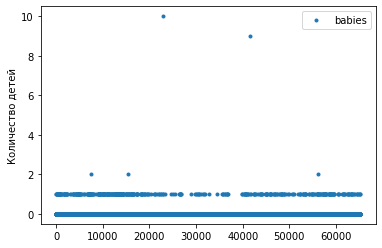

In [15]:
# проверим на аномальные количества детей
df_train['babies'].plot(style='.', legend=True, ylabel='Количество детей');

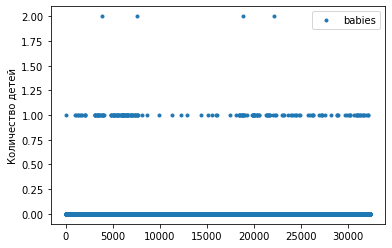

In [16]:
# проверим на аномальные количества детей
df_test['babies'].plot(style='.', legend=True, ylabel='Количество детей');

In [17]:
# удаление аномальных строк из таблицы
train_index_two = list(df_train.query('babies >= 9').index)
df_train = df_train.drop(index=train_index_two)
# df_train.loc[41528]
df_train.shape

(65061, 24)

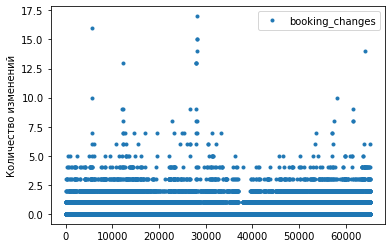

In [18]:
# посмотриv на количество вносимых изменений
df_train['booking_changes'].plot(style='.', legend=True, ylabel='Количество изменений');

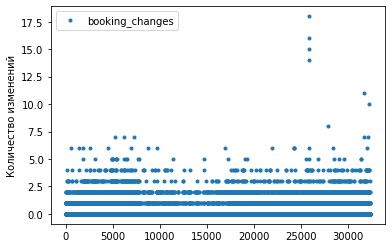

In [19]:
# посмотриv на количество вносимых изменений
df_test['booking_changes'].plot(style='.', legend=True, ylabel='Количество изменений');

In [20]:
# удаление аномальных строк из таблицы
train_index_thr = list(df_train.query('booking_changes > 7').index)
test_index_thr = list(df_test.query('booking_changes > 7').index)
df_train = df_train.drop(index=train_index_thr)
df_test = df_test.drop(index=test_index_thr)
# df_train.loc[64035]
# df_test.loc[32301]
display(df_train.shape)
display(df_test.shape)

(65037, 24)

(32336, 24)

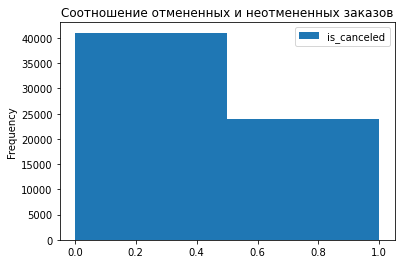

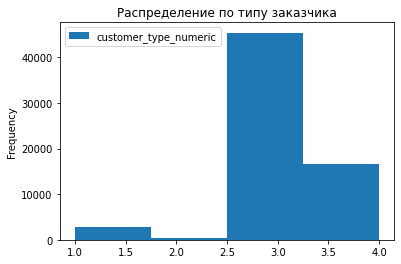

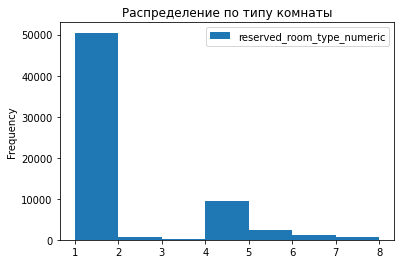

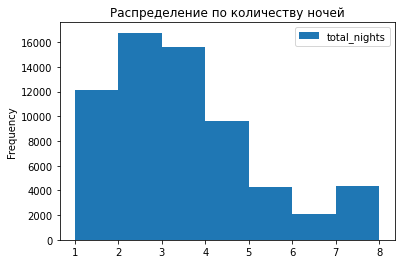

In [21]:
# выведем на экран соотношение закрытых и не закрытых заказов
df_train.plot(y='is_canceled', title='Соотношение отмененных и неотмененных заказов', kind='hist', bins=2, range=(0, 1));
# выведем на экран распределение по типам заказчиков
df_train.plot(y='customer_type_numeric', title='Распределение по типу заказчика', kind='hist', bins=4, range=(1, 4));
# выведем на экран распределение по типам комнат
df_train.plot(y='reserved_room_type_numeric', title='Распределение по типу комнаты', kind='hist', bins=7, range=(1, 8));
# выведем на экран распределение по количеству ночей
df_train.plot(y='total_nights', title='Распределение по количеству ночей', kind='hist', bins=7, range=(1, 8));

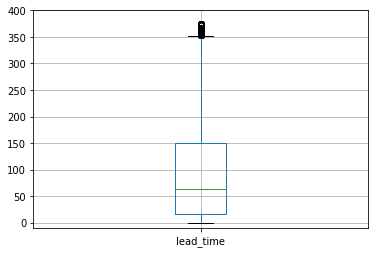

In [22]:
# выведем график "ящик с усами" для количества дней между бронированием и прибытием
plt.ylim(-10, 400)
df_train.boxplot(column='lead_time');

,customer_type_numeric,meal_numeric,reserved_room_type_numeric,total_nights
customer_type_numeric,1.000000,0.152698,-0.116098,0.003371
meal_numeric,0.152698,1.000000,-0.056443,-0.021271
reserved_room_type_numeric,-0.116098,-0.056443,1.000000,0.528431
total_nights,0.003371,-0.021271,0.528431,1.000000


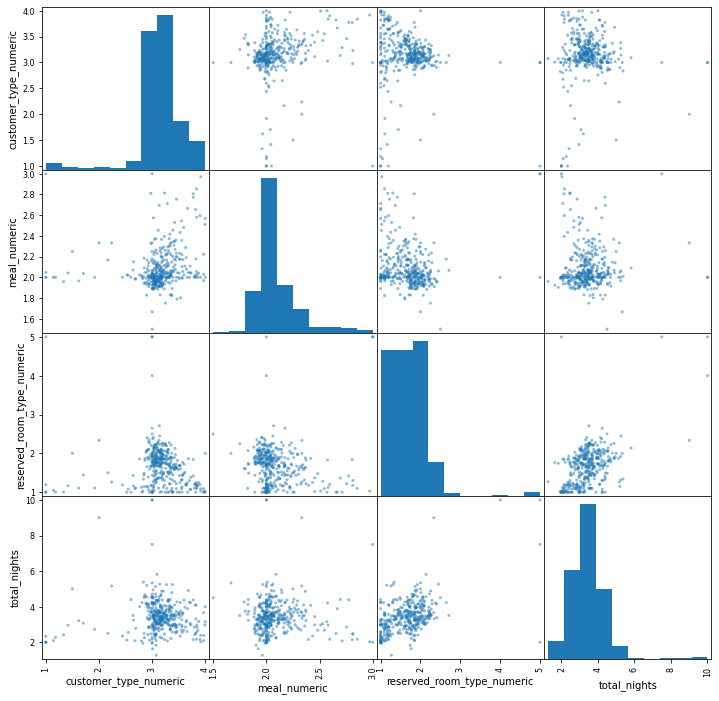

In [23]:
# создание сводной таблицы для анализа завсимостей
df_train_pivot = df_train.pivot_table(index='lead_time', values=['reserved_room_type_numeric', 'customer_type_numeric', 'total_nights', 'meal_numeric'])
# построение матрицы диаграмм рассеивания
pd.plotting.scatter_matrix(df_train_pivot, figsize=(12, 12));
# получение значений корреляции
df_train_pivot.corr()

##### Вывод

- Столбец `country` преобразован в категориальный формат где топ 6 стран по количеству заказов соответсвуют цифрам от 1 до 6, все остальные объединены в группу с цифрой 7
- Из таблиц удалены строки не прошедшие проверку на адекватность: были номера без взрослых, но с детьми (менее 1% данных)
- Удален столбец `stays_in_week_nights` так как по столбцам `stays_in_weekend_nights` и `total_nights` можно его воссоздать
- Соотношение отмененных заказов к неотмененным 1:2
- Наиболее частый тип заказчика `Transient`
- Чаще всего оформляют бронь на комнаты типа `A`
- Медианное количество дней между бронированием и подтверждением составляет 60-70 дней
- Среди данных о количестве детей есть цифры 9 и 10, что является выбросом (менее 1% данных). Данные были удалены.
- Среди данных о количество вносимых изменений есть цифры больше 7, что также является выбросом (менее 1% данных). Данные были удалены.
- Чаще всего заказывают номера на 1,2,3 и 4 ночи
- Заказчик `Transient`как правило заказывает опцию "завтрак включен", а также номера категории `A` и `B`
- Чаще всего бронируют на 2-3 ночи номера категории `A` и `B` с опцией "завтрак включен"

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

In [24]:
# расчет прибыли (убытков) отеля без внедрения депозитов
def expected_profit(row):
    var = row['reserved_room_type']
    val = row['is_canceled']
    
    if var == 'A' and val == 0:
        value = row['total_nights'] * 1000
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = (value * 1.2) - (math.floor(row['total_nights'] / 2) * 400) - 400
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = (value * 1.4) - (math.floor(row['total_nights'] / 2) * 400) - 400
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = (value * 1.0) - (math.floor(row['total_nights'] / 2) * 400) - 400
            return value
    elif var == 'A' and val == 1:
        value = 0 - 1 * 1000
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = value * 1.2 - 400
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = value * 1.4 - 400
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = value * 1.0 - 400
            return value  
        
    elif var == 'B' and val == 0:
        value = row['total_nights'] * 800
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = (value * 1.2) - (math.floor(row['total_nights'] / 2) * 350) - 350
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = (value * 1.4) - (math.floor(row['total_nights'] / 2) * 350) - 350
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = (value * 1.0) - (math.floor(row['total_nights'] / 2) * 350) - 350
            return value
    elif var == 'B' and val == 1:
        value = 0 - 1 * 800
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = value * 1.2 - 350
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = value * 1.4 - 350
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = value * 1.0 - 350
            return value
        
    elif var == 'C' and val == 0:
        value = row['total_nights'] * 600
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = (value * 1.2) - (math.floor(row['total_nights'] / 2) * 350) - 350
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = (value * 1.4) - (math.floor(row['total_nights'] / 2) * 350) - 350
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = (value * 1.0) - (math.floor(row['total_nights'] / 2) * 350) - 350
            return value
    elif var == 'C' and val == 1:
        value = 0 - 1 * 600
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = value * 1.2 - 350
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = value * 1.4 - 350
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = value * 1.0 - 350
            return value        
        
    elif var == 'D' and val == 0:
        value = row['total_nights'] * 550
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = (value * 1.2) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = (value * 1.4) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = (value * 1.0) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
    elif var == 'D' and val == 1:
        value = 0 - 1 * 550
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = value * 1.2 - 150
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = value * 1.4 - 150
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = value * 1.0 - 150
            return value         
 
    elif var == 'E' and val == 0:
        value = row['total_nights'] * 500
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = (value * 1.2) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = (value * 1.4) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = (value * 1.0) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
    elif var == 'E' and val == 1:
        value = 0 - 1 * 500
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = value * 1.2 - 150
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = value * 1.4 - 150
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = value * 1.0 - 150
            return value
 
    elif var == 'F' and val == 0:
        value = row['total_nights'] * 450
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = (value * 1.2) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = (value * 1.4) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = (value * 1.0) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
    elif var == 'F' and val == 1:
        value = 0 - 1 * 450
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = value * 1.2 - 150
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = value * 1.4 - 150
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = value * 1.0 - 150
            return value
 
    elif var == 'G' and val == 0:
        value = row['total_nights'] * 350
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = (value * 1.2) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = (value * 1.4) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = (value * 1.0) - (math.floor(row['total_nights'] / 2) * 150) - 150
            return value
    elif var == 'G' and val == 1:
        value = 0 - 1 * 350
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = value * 1.2 - 150
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = value * 1.4 - 150
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = value * 1.0 - 150
            return value
        
# прменим функцию расчета прибыли (убытков) отеля
df_train['expected_profit'] = df_train.apply(expected_profit, axis=1)
df_test['expected_profit'] = df_test.apply(expected_profit, axis=1)
# удаление столбца, где тип данных object
df_train = df_train.drop(['reserved_room_type'], axis=1)
df_test = df_test.drop(['reserved_room_type'], axis=1)
# выведем таблицы с результатами на экран
display(df_train.head(5))
display(df_test.head(5))

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,country_numeric,arrival_date_month_numeric,meal_numeric,customer_type_numeric,distribution_channel_numeric,reserved_room_type_numeric,expected_profit
0,0,7,2015,27,1,0,1,0,0,0,0,0,0,0,0,0,1,3,7,2,3,1,1,1000.0
1,0,14,2015,27,1,0,2,0,0,0,0,0,0,0,0,1,2,3,7,2,3,2,1,2000.0
2,0,0,2015,27,1,0,2,0,0,0,0,0,0,0,0,0,2,1,7,2,3,1,3,980.0
3,0,9,2015,27,1,0,2,0,0,0,0,0,0,0,0,1,2,1,7,4,3,1,3,980.0
4,1,85,2015,27,1,0,2,0,0,0,0,0,0,0,0,1,3,1,7,2,3,2,1,-1800.0


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,country_numeric,arrival_date_month_numeric,meal_numeric,customer_type_numeric,distribution_channel_numeric,reserved_room_type_numeric,expected_profit
0,1,74,2017,1,1,1,2,0,0,0,0,0,0,0,0,0,1,1,1,2,3,2,1,-1400.0
1,1,62,2017,1,1,2,2,0,0,0,0,0,0,0,0,1,4,7,1,2,3,2,1,-1400.0
2,1,62,2017,1,1,2,2,0,0,0,0,0,0,0,0,1,4,7,1,2,3,2,1,-1400.0
3,1,71,2017,1,1,2,1,0,0,0,0,0,0,0,0,1,4,1,1,2,3,2,1,-1400.0
4,1,172,2017,1,1,2,2,0,0,0,0,0,0,0,0,0,7,7,1,2,3,2,1,-1400.0


In [25]:
# выведем на экран значение прибыли отеля по месяцам и суммарно по всем данным таблицы df_train
display(df_train.groupby(by='arrival_date_month_numeric')['expected_profit'].sum())
display('df_train_profit:', df_train.expected_profit.sum())
# выведем на экран значение прибыли отеля по месяцам и суммарно по всем данным таблицые df_test
df_before_model = df_test.groupby(by='arrival_date_month_numeric')['expected_profit'].sum()
display(df_before_model)
df_before_model_total = df_test.expected_profit.sum()
display('df_test_profit:', df_before_model_total)

arrival_date_month_numeric
1     1404100.0
2     1982800.0
3     5039830.0
4     4129910.0
5     4743990.0
6     4740640.0
7     7563220.0
8     8742400.0
9     8018650.0
10    8516700.0
11    6806210.0
12    4183500.0
Name: expected_profit, dtype: float64

'df_train_profit:'

65871950.0

arrival_date_month_numeric
1    2167850.0
2    2919300.0
3    5057710.0
4    4133580.0
5    3847390.0
6    4361830.0
7    4999870.0
8    5001020.0
Name: expected_profit, dtype: float64

'df_test_profit:'

32488550.0

In [26]:
# расчет депозитов
def profit_with_deposit(row):
    var = row['reserved_room_type_numeric']
    val = row['is_canceled']
    profit = row['expected_profit']
    
    if var == 1 and val == 0:
        value = profit
        return value 
    elif var == 1 and val == 1:
        value = 1 * 1000
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = ((value * 1.2) + 400) * 0.8 - ((value * 1.2) + 400)
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = ((value * 1.4) + 400) * 0.8 - ((value * 1.4) + 400)
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = ((value * 1.0) + 400) * 0.8 - ((value * 1.0) + 400)
            return value 
    
    if var == 2 and val == 0:
        value = profit
        return value 
    elif var == 2 and val == 1:
        value = 1 * 800
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = ((value * 1.2) + 350) * 0.8 - ((value * 1.2) + 350)
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = ((value * 1.4) + 350) * 0.8 - ((value * 1.4) + 350)
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = ((value * 1.0) + 350) * 0.8 - ((value * 1.0) + 350)
            return value 
    
    if var == 3 and val == 0:
        value = profit
        return value 
    elif var == 3 and val == 1:
        value = 1 * 600
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = ((value * 1.2) + 350) * 0.8 - ((value * 1.2) + 350)
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = ((value * 1.4) + 350) * 0.8 - ((value * 1.4) + 350)
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = ((value * 1.0) + 350) * 0.8 - ((value * 1.0) + 350)
            return value
    
    if var == 4 and val == 0:
        value = profit
        return value 
    elif var == 4 and val == 1:
        value = 1 * 550
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = ((value * 1.2) + 150) * 0.8 - ((value * 1.2) + 150)
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = ((value * 1.4) + 150) * 0.8 - ((value * 1.4) + 150)
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = ((value * 1.0) + 150) * 0.8 - ((value * 1.0) + 150)
            return value
    
    if var == 5 and val == 0:
        value = profit
        return value 
    elif var == 5 and val == 1:
        value = 1 * 500
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = ((value * 1.2) + 150) * 0.8 - ((value * 1.2) + 150)
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = ((value * 1.4) + 150) * 0.8 - ((value * 1.4) + 150)
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = ((value * 1.0) + 150) * 0.8 - ((value * 1.0) + 150)
            return value         
    
    if var == 6 and val == 0:
        value = profit
        return value 
    elif var == 6 and val == 1:
        value = 1 * 450
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = ((value * 1.2) + 150) * 0.8 - ((value * 1.2) + 150)
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = ((value * 1.4) + 150) * 0.8 - ((value * 1.4) + 150)
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = ((value * 1.0) + 150) * 0.8 - ((value * 1.0) + 150)
            return value          
    
    if var == 7 and val == 0:
        value = profit
        return value 
    elif var == 7 and val == 1:
        value = 1 * 350
        if row['arrival_date_month_numeric'] in (3, 4, 5, 9, 10, 11):
            value = ((value * 1.2) + 150) * 0.8 - ((value * 1.2) + 150)
            return value
        elif row['arrival_date_month_numeric'] in (6, 7, 8):
            value = ((value * 1.4) + 150) * 0.8 - ((value * 1.4) + 150)
            return value
        elif row['arrival_date_month_numeric'] in (12, 1, 2):
            value = ((value * 1.0) + 150) * 0.8 - ((value * 1.0) + 150)
            return value        
        
# прменим функцию расчета прибыли с учетом депозита 
df_train['profit_with_deposit'] = df_train.apply(profit_with_deposit, axis=1)
df_test['profit_with_deposit'] = df_test.apply(profit_with_deposit, axis=1)
# выведем таблицы с результатами на экран
display(df_train.head(5))
display(df_test.head(5))

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,country_numeric,arrival_date_month_numeric,meal_numeric,customer_type_numeric,distribution_channel_numeric,reserved_room_type_numeric,expected_profit,profit_with_deposit
0,0,7,2015,27,1,0,1,0,0,0,0,0,0,0,0,0,1,3,7,2,3,1,1,1000.0,1000.0
1,0,14,2015,27,1,0,2,0,0,0,0,0,0,0,0,1,2,3,7,2,3,2,1,2000.0,2000.0
2,0,0,2015,27,1,0,2,0,0,0,0,0,0,0,0,0,2,1,7,2,3,1,3,980.0,980.0
3,0,9,2015,27,1,0,2,0,0,0,0,0,0,0,0,1,2,1,7,4,3,1,3,980.0,980.0
4,1,85,2015,27,1,0,2,0,0,0,0,0,0,0,0,1,3,1,7,2,3,2,1,-1800.0,-360.0


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,country_numeric,arrival_date_month_numeric,meal_numeric,customer_type_numeric,distribution_channel_numeric,reserved_room_type_numeric,expected_profit,profit_with_deposit
0,1,74,2017,1,1,1,2,0,0,0,0,0,0,0,0,0,1,1,1,2,3,2,1,-1400.0,-280.0
1,1,62,2017,1,1,2,2,0,0,0,0,0,0,0,0,1,4,7,1,2,3,2,1,-1400.0,-280.0
2,1,62,2017,1,1,2,2,0,0,0,0,0,0,0,0,1,4,7,1,2,3,2,1,-1400.0,-280.0
3,1,71,2017,1,1,2,1,0,0,0,0,0,0,0,0,1,4,1,1,2,3,2,1,-1400.0,-280.0
4,1,172,2017,1,1,2,2,0,0,0,0,0,0,0,0,0,7,7,1,2,3,2,1,-1400.0,-280.0


In [27]:
# выведем на экран значение прибыли отеля по месяцам и суммарно по всем данным таблицы df_train с учетом депозитов
display(df_train.groupby(by='arrival_date_month_numeric')['profit_with_deposit'].sum())
display('df_train_profit_depo:', df_train.profit_with_deposit.sum())
# выведем на экран значение прибыли отеля по месяцам и суммарно по всем данным таблицые df_test с учетом депозитов
df_before_model_all_deposit = df_test.groupby(by='arrival_date_month_numeric')['profit_with_deposit'].sum()
display(df_before_model_all_deposit)
df_before_model_all_deposit_total = df_test.profit_with_deposit.sum()
display('df_test_profit_depo:', df_before_model_all_deposit_total)

arrival_date_month_numeric
1      1914500.0
2      3234680.0
3      6500878.0
4      6251254.0
5      6647486.0
6      7300680.0
7     10460804.0
8     12154968.0
9     12110066.0
10    12690460.0
11     8993666.0
12     6080980.0
Name: profit_with_deposit, dtype: float64

'df_train_profit_depo:'

94340422.0

arrival_date_month_numeric
1    3246890.0
2    4040620.0
3    6616014.0
4    6557636.0
5    6462390.0
6    7012870.0
7    6615886.0
8    6336620.0
Name: profit_with_deposit, dtype: float64

'df_test_profit_depo:'

46888926.0

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

#### Вывод

- Без введения депозитов, отель показывает прибыль без убытков в разрезе мясецев
- С учетом введения депозитов в прошлом, теоритически прибыль могла возрасти на 46% при условии предсказывания каждого варианта отказа.

### Шаг 4. Разработка модели ML

In [28]:
# обозначим признаки и цели для таблицы df_train
target_one = df_train['is_canceled']
features_one = df_train.drop(['is_canceled', 'expected_profit', 'profit_with_deposit'], axis=1)
# обозначим признаки и цели для таблицы df_test
target_test = df_test['is_canceled']
features_test = df_test.drop(['is_canceled', 'expected_profit', 'profit_with_deposit'], axis=1)
# проверим размерности выборок
display(f'features_one shape: {features_one.shape}')
display(f'target_one shape: {target_one.shape}')
display(f'features_test shape: {features_test.shape}')
display(f'target_test shape: {target_test.shape}')

'features_one shape: (65037, 22)'

'target_one shape: (65037,)'

'features_test shape: (32336, 22)'

'target_test shape: (32336,)'

In [29]:
# создадим список названий столбцов
column_list = list(features_one.columns)
# стандартизируем данные и настроим на признаках
scaler = StandardScaler()
scaler.fit(features_one) 
# преобразуем выборки
features_one = scaler.transform(features_one) 
features_test = scaler.transform(features_test) 
# уберем предупреждение `SettingWithCopy`
pd.options.mode.chained_assignment = None
# получим заголовки для признаков и скорректируем преобразованные выборки
features_one = pd.DataFrame(features_one, columns = column_list, index=target_one.index)
features_test = pd.DataFrame(features_test, columns = column_list, index=target_test.index)

#### Выбор метрики и гиперпараметров

Так как полнота и точность оценивают качество прогноза положительного класса с разных позиций. Recall описывает, как хорошо модель разобралась в особенностях класса и распознала его. Precision выявляет, не преувеличивает ли модель, присваивая положительные метки. Поэтому оптимальным решением будет выбор  F1 меры и `ROC-AUC`

In [30]:
# # методом кросс валидации подберем предварительные результаты по модели случайного леса
# model_one = RandomForestClassifier(class_weight='balanced', random_state=42)
# scores_one = cross_val_score(model_one, features_one, target_one, scoring='f1', cv=5) 
# final_one = scores_one.mean()
# display(final_one)
# # методом кросс валидации подберем предварительные результаты по модели решающего дерева
# model_two = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# scores_two = cross_val_score(model_two, features_one, target_one, scoring='f1', cv=5) 
# final_two = scores_two.mean()
# display(final_two)
# # методом кросс валидации подберем предварительные результаты по модели логистической регрессии
# model_thr = LogisticRegression(class_weight='balanced', random_state=42)
# scores_thr = cross_val_score(model_thr, features_one, target_one, scoring='f1', cv=5) 
# final_thr = scores_thr.mean()
# display(final_thr)

#### Случайный лес

In [31]:
%%time
### обучим модель случайного леса с помощью gridsearch для расчета f1 меры
# параметры по сетке
parameters = {
    'n_estimators': [11, 13, 15],
    'max_depth': [5, 7, 9, 11],
    'min_samples_leaf': [6, 7, 8, 9]
}
ran_for = RandomForestClassifier(class_weight='balanced', random_state=42)
clf = GridSearchCV(ran_for, parameters, scoring='f1', cv=15, n_jobs=-1)
clf.fit(features_one, target_one)
display(clf.best_score_)
display(clf.best_params_)

0.6477254592186273

{'max_depth': 5, 'min_samples_leaf': 8, 'n_estimators': 13}

CPU times: user 3min 40s, sys: 326 ms, total: 3min 40s
Wall time: 3min 42s


In [32]:
%%time
### обучим модель случайного леса с помощью gridsearch для расчета roc-auc
clf_roc_auc = GridSearchCV(ran_for, parameters, scoring='roc_auc', cv=15, n_jobs=-1)
clf_roc_auc.fit(features_one, target_one)
display(clf_roc_auc.best_score_)
display(clf_roc_auc.best_params_)

0.7970432624790206

{'max_depth': 5, 'min_samples_leaf': 8, 'n_estimators': 15}

CPU times: user 3min 45s, sys: 360 ms, total: 3min 45s
Wall time: 3min 46s


#### Решающее дерево

In [33]:
%%time
### обучим модель решающего дерева с помощью gridsearch для расчета f1 меры
# параметры по сетке
parameters_two = {
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_leaf': [5, 6, 7, 8],
    'max_features': [2, 3, 4]
}
dec_thr = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf_two = GridSearchCV(dec_thr, parameters_two, scoring='f1', cv=15, n_jobs=-1)
clf_two.fit(features_one, target_one)
display(clf_two.best_score_)
display(clf_two.best_params_)

0.6476312807421208

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 7}

CPU times: user 30.1 s, sys: 16 ms, total: 30.1 s
Wall time: 30.1 s


In [34]:
%%time
### обучим модель решающего дерева с помощью gridsearch для расчета roc-auc
clf_two_roc_auc = GridSearchCV(dec_thr, parameters_two, scoring='roc_auc', cv=15, n_jobs=-1)
clf_two_roc_auc.fit(features_one, target_one)
display(clf_two_roc_auc.best_score_)
display(clf_two_roc_auc.best_params_)

0.7627665537633478

{'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 7}

CPU times: user 30.8 s, sys: 44 ms, total: 30.8 s
Wall time: 31 s


#### Логистическая регрессия

In [35]:
%%time
### обучим модель логистической регрессии с помощью gridsearch для расчета f1 меры
# параметры по сетке
parameters_thr = {
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'penalty': ['l2'],
    'max_iter': [10000, 15000]
}
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
clf_thr = GridSearchCV(log_reg, parameters_thr, scoring='f1', cv=15, n_jobs=-1)
clf_thr.fit(features_one, target_one)
display(clf_thr.best_score_)
display(clf_thr.best_params_)

0.5834010658869809

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}

CPU times: user 4min 4s, sys: 4min 27s, total: 8min 31s
Wall time: 8min 32s


In [36]:
%%time
### обучим модель логистической регрессии с помощью gridsearch для расчета roc-auc
clf_thr_roc_auc = GridSearchCV(log_reg, parameters_thr, scoring='roc_auc', cv=15, n_jobs=-1)
clf_thr_roc_auc.fit(features_one, target_one)
display(clf_thr_roc_auc.best_score_)
display(clf_thr_roc_auc.best_params_)

0.7752816785863034

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'}

CPU times: user 3min 58s, sys: 4min 55s, total: 8min 54s
Wall time: 8min 55s


#### Тестирование лучшей модели

In [37]:
# обучим модель на выборке
model_test = RandomForestClassifier(random_state=42, max_depth=5, min_samples_leaf=8, n_estimators=4, class_weight='balanced') 
model_test.fit(features_one, target_one)
# тестирование модели решающего дерева
predictions_test = pd.Series(model_test.predict(features_test), index=features_test.index) 
result_test = f1_score(target_test, predictions_test)
# выведем результат на экран
display(f'Результат модели случайного леса на тестовой выборке: {result_test}')

'Результат модели случайного леса на тестовой выборке: 0.6684446599587828'

In [38]:
# добавим столбец в таблицу
df_test['predictions_deposit'] = predictions_test
# функция расчета итоговой прибыли от депозитов с учетом предсказаний модели
def predict_depo(row):
    profit = row['expected_profit']
    depo_profit = row['profit_with_deposit']
    cancel = row['is_canceled']
    predict = row['predictions_deposit']
    if (predict == 0 and cancel == 0) or (predict == 1 and cancel == 0) or (predict == 0 and cancel == 1):
        value = profit
        return value
    elif predict == 1 and cancel == 1:
        value = depo_profit
        return value
# применим функцию к таблице
df_test['predictions_deposit_profit'] = df_test.apply(predict_depo, axis=1)        
# выведем на экран значение прибыли отеля по месяцам и суммарно по всем данным таблицые df_test с учетом работы модели
df_after_model = df_test.groupby(by='arrival_date_month_numeric')['predictions_deposit_profit'].sum()
display(df_after_model)
df_after_model_total = df_test.predictions_deposit_profit.sum()
display('df_test_model_depo:', df_after_model_total)

arrival_date_month_numeric
1    2823690.0
2    3622100.0
3    6143038.0
4    5921852.0
5    5723902.0
6    6312294.0
7    5888494.0
8    5705092.0
Name: predictions_deposit_profit, dtype: float64

'df_test_model_depo:'

42140462.0

In [44]:
# функция расчета окупаемости
BUDGET = 400000
def budget_model_profit(series_before, series_after):
    value_month = series_after - series_before
    value_total = series_after.sum() - series_before.sum() - BUDGET
    return value_month, value_total
# посчитаем окупаемость модели
budget_model_profit(df_before_model, df_after_model)

(arrival_date_month_numeric
 1     655840.0
 2     702800.0
 3    1085328.0
 4    1788272.0
 5    1876512.0
 6    1950464.0
 7     888624.0
 8     704072.0
 dtype: float64,
 9251912.0)

'ROC-AUC для модели решающего дерева:'

0.8029138251280585

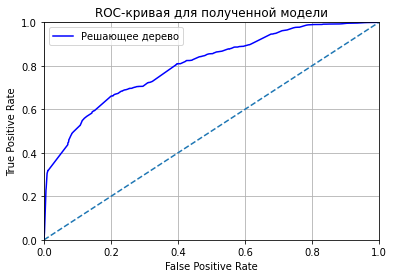

In [39]:
# рассчитаем вероятности
probabilities_test = model_test.predict_proba(features_test)
probabilities_test_a = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_test_a)
# посчитаем площадь под кривой
display('ROC-AUC для модели решающего дерева:', auc_roc)
# рассчитаем значения FPR, TPR и порога
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test_a)  
# построим график с сеткой
plt.figure()
plt.grid(True)
plt.plot(fpr, tpr, color='b')
# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')
# установим границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
# подшишем оси
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# укажем заголовок
plt.title('ROC-кривая для полученной модели')
plt.legend(['Решающее дерево'])
plt.show()

#### Вывод

- Модель случайного леса предсказывает более удачно отказ от брони на обучающих данных (f1 = 0.647, Roc-Auc = 0.797)
- При внедрении депозитов и предсказывающей модели прибыль отеля за `тестовый` период увеличивается на 9,7 млн. руб.
- Бюджет на разработку в размере 400 тыс. рублей окупится уже в первый месяц

### Шаг 5. Опишите портрет «ненадёжного» клиента

In [40]:
# получим срез по отмененным бронированиям
df_canceled = df_train.query('is_canceled == 1')
# выведем количественные значения значения
display('meal_numeric', df_canceled.meal_numeric.value_counts())
display('customer_type_numeric', df_canceled.customer_type_numeric.value_counts())
display('reserved_room_type_numeric', df_canceled.reserved_room_type_numeric.value_counts())
display('previous_bookings_not_canceled', df_canceled.previous_bookings_not_canceled.value_counts())
display('booking_changes', df_canceled.booking_changes.value_counts())
display('days_in_waiting_list', df_canceled.days_in_waiting_list.value_counts())
display('total_of_special_requests', df_canceled.total_of_special_requests.value_counts())

'meal_numeric'

2    18881
3     2808
1     1990
4      311
Name: meal_numeric, dtype: int64

'customer_type_numeric'

3    17987
4     4889
1     1090
2       24
Name: customer_type_numeric, dtype: int64

'reserved_room_type_numeric'

1    19719
4     2870
5      608
6      345
2      214
7      191
3       43
Name: reserved_room_type_numeric, dtype: int64

'previous_bookings_not_canceled'

0     23892
1        35
2        13
3         9
4         8
25        8
5         7
6         3
12        3
8         2
10        2
11        2
48        1
58        1
27        1
44        1
29        1
15        1
Name: previous_bookings_not_canceled, dtype: int64

'booking_changes'

0    22676
1      898
2      305
3       60
4       31
5       10
6        8
7        2
Name: booking_changes, dtype: int64

'days_in_waiting_list'

0      21871
39       185
31       125
44       108
35        93
       ...  
14         1
30         1
27         1
5          1
193        1
Name: days_in_waiting_list, Length: 73, dtype: int64

'total_of_special_requests'

0    19473
1     3054
2     1248
3      202
4       13
Name: total_of_special_requests, dtype: int64

#### Вывод

Ненадежный клиент чаще всего обладает следующими признаками:
- Опция заказа со статусом `BB`
- Тип заказчика `Transient` и `Transient-Party`
- Тип забронированной комнаты `A`
- Не имеет ранее подтвержденных заказов
- Не вносит изменений параметров заказа
- Ноль дней заказ ожидал подтверждения
- Отсутствуют специальные отметки